<a href="https://colab.research.google.com/github/Gigi4o/SIMM_71-/blob/main/Assignment_1___SIMM_71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Assignment 1: National Anthem Analysis**
In this notebook, an attempt has been made to analyze national anthems and group them based on their content. The initial assumption for the research project has been that national anthems, as tools of self-expression by states, should capture differences in values and self-portrayal. While the project does not delve deep into national identity building and the role of national anthems in this process, it makes an attempt to answer the following question:

**Do national anthems capture distinctions in social values?**

To find the answer to this question, we are using NLP models. By employing LDA and BERT models, we have grouped national anthems into thematically coherent groups. Once the anthems have been clustered, using a topic modeling approach, we made an attempt to interpret findings and map the space for future research.

# Introduction:

Data is loaded from GitHub. Notably, the data is collected from Kaggle (https://www.kaggle.com/code/kerneler/starter-national-anthems-of-the-world-17694286-a/notebook). It contains English translations of 190 nation's anthems. To ensure the validity of the data, 5 national anthems have been randomly selected and compared to the original versions (using google translate).

**Load Packages:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud



Loading data from a Git account. The data already contains information on countries, abbreviations for country names in two and three-letter formats (useful for visualization), continent, and the English translation of the anthem.

In [2]:
fp = "https://raw.githubusercontent.com/Gigi4o/SIMM_71-/main/National_Anthems.txt"
df = pd.read_csv(fp, header=0, sep="\t", encoding='utf-8')
df.head(6)

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
5,Belgium,BE,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â..."


To recheck the quality of the translation and verify if the data is loaded correctly, I am taking a look at the national anthem with which I am most familiar.

In [3]:
row_georgia = df[df['Country'] == 'Georgia']
print(row_georgia)

    Country Alpha-2 Alpha-3 Continent  \
15  Georgia      GE     GEO    Europe   

                                               Anthem  
15  My icon is my motherland, And the whole world ...  


#Initiail overvew of the data

To gain a comprehensive understanding of the dataset and lay the groundwork for subsequent analyses, our initial focus is on exploring the unfiltered data. This crucial step serves as a foundation for identifying potential challenges and shortcomings that may arise during later stages of the analysis. By taking dive into the raw data, we aim to uncover any irregularities, or outliers that could impact the reliability and accuracy of our results.

This proactive approach not only allows us to anticipate potential pitfalls but also enables us to implement strategies to mitigate these challenges effectively. Additionally,  exploration provides  insights into the nature of the dataset, allowing us to make informed decisions on later stages of analysis.

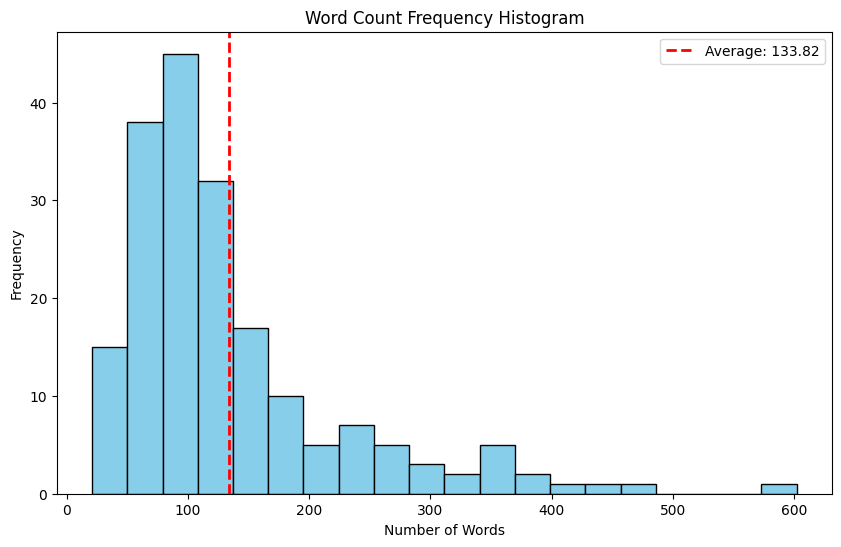

In [4]:

# Initiating new dataframe, to count the number of words per anthem
df['Word_Count'] = df['Anthem'].apply(lambda x: len(str(x).split()))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Word_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Word Count Frequency Histogram')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
# Adding average line
average_word_count = df['Word_Count'].mean()
plt.axvline(average_word_count, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_word_count:.2f}')

plt.legend()

# Save the plot as 'plt_uncleaned.png'
plt.savefig('plt_uncleaned.png')

plt.show()



In the initial exploration of the dataset, our focus is on understanding the distribution of word counts within the national anthems. Preliminary observations reveal a predominant concentration within the word limit range of 50-150 words. More detailed examination will be undertaken in subsequent stages.

Notably, the majority of national anthems conform to a concise structure, as indicated by the prevalent concentration within the specified word limit. However, it is crucial to acknowledge the presence of outliers, with some anthems extending up to approximately 600 words. This disparity in word count suggests a diverse range of compositions, potentially reflecting variations in cultural and historical narratives embedded within national anthems.

Furthermore, the size of the textual data (anthems) is important, as different models handle varying text sizes with diverging success. Consequently, a better understanding of the input data will enable us to choose the most appropriate models.

In the subsequent phase of our analysis, we will examine the top and bottom five national anthems based on word count. By doing so we will further extent our understanding of the available data.

In [5]:
# Identify top 5 and bottom 5 national anthems based on word count
top5_anthems = df.nlargest(5, 'Word_Count')[['Country', 'Word_Count']]
bottom5_anthems = df.nsmallest(5, 'Word_Count')[['Country', 'Word_Count']]

# Display the results
print("Top 5 National Anthems based on Word Count:")
print(top5_anthems)

print("\nBottom 5 National Anthems based on Word Count:")
print(bottom5_anthems)

Top 5 National Anthems based on Word Count:
       Country  Word_Count
52        Peru         602
128     Turkey         485
44   Argentina         436
63    Honduras         416
45     Bolivia         384

Bottom 5 National Anthems based on Word Count:
           Country  Word_Count
102          Japan          21
23   Liechtenstein          26
22          Latvia          30
9           Cyprus          38
17          Greece          38


 Next analytical step involves generating word clouds to potentially spot the thematic patterns. However, to mitigate the potential influence of longer anthems over shorter ones, we'll categorize them into distinct groups based on word count thresholds. These groups will be split as follows: 0-150 words, 151-300 words, and anthems exceeding 300 words.

By stratifying the anthems into these word count brackets, we aim to provide a more balanced representation of thematic content across different lengths (if there is any) and will limit the potential domination of the long anthems over the shorter ones.

Word clouds are a very simple way of approaching the analysis, and they serve to extend our understanding of the data rather than conducting an actual analysis.

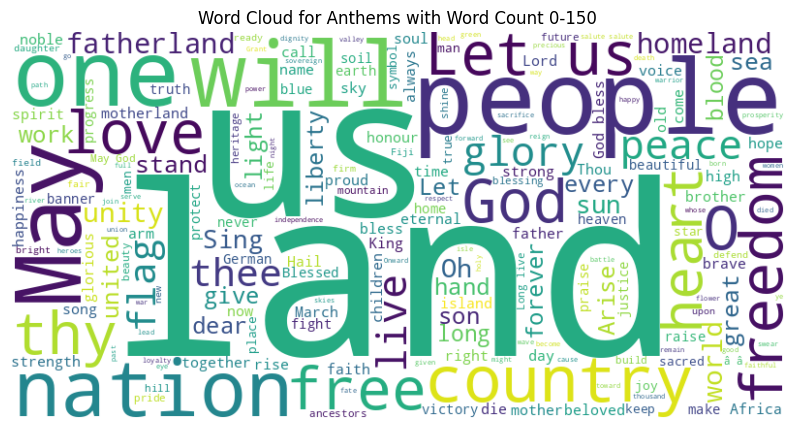

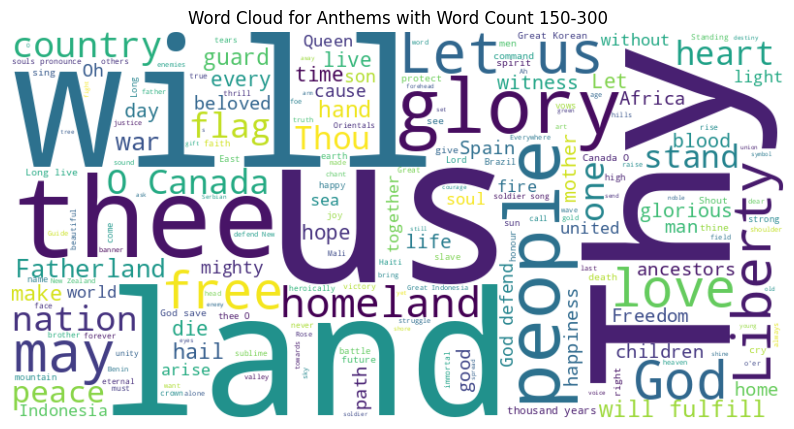

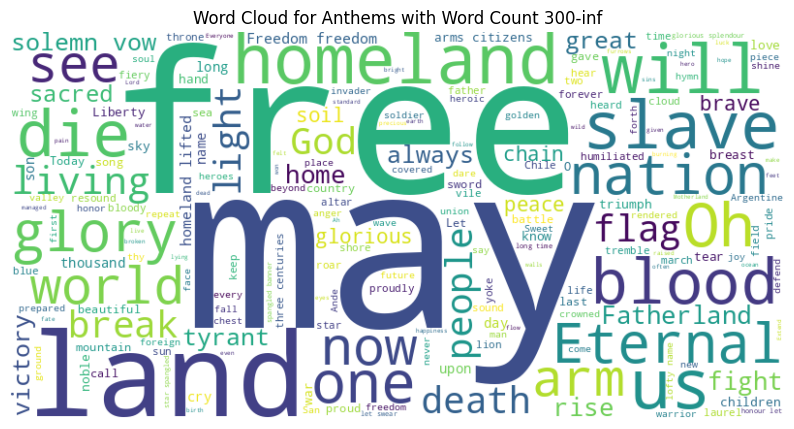

In [6]:
# Define word count thresholds
thresholds = [0, 150, 300, float('inf')]

# Create word clouds for each group
for i in range(len(thresholds) - 1):
    min_count, max_count = thresholds[i], thresholds[i + 1]
    group_df = df[(df['Word_Count'] >= min_count) & (df['Word_Count'] < max_count)]

    # Concatenate anthems in the group to create a single text for the word cloud
    group_text = ' '.join(group_df['Anthem'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(group_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Anthems with Word Count {min_count}-{max_count}')
    plt.axis('off')
    plt.show()

While the word cloud analysis may not provide in-depth insights into the specific characteristics of national anthem distributions based on word count, it does offer an evidence that, regardless of the length of national anthem, general thematic similarities persist. Notably, common words such as "Free," "Land," "Homeland," "People," and "Nation" consistently emerge across different word count groups.

To advance to the next stages of the analysis, a more in-depth exploration of the topics within national anthems is planned. Two distinct approaches, namely LDA (Latent Dirichlet Allocation) and BERT models, will be employed. However, before delving into these natural language processing (NLP) models, it's imperative to prepare the data for analysis. The raw data, contains noise and has the potential to skew anlysis into a misleading direction. Thus, the initial step involves cleaning and refining the data to ensure a more accurate and meaningful interpretation of the results. This preparatory phase aims to enhance the reliability of subsequent NLP models and facilitate a more nuanced exploration of the underlying themes and patterns within national anthems.

# Data Cleaning and Preparation for LDA model

In preparation for an LDA (Latent Dirichlet Allocation) model, it is crucial to undertake several key steps to ensure the data is well-suited for topic modeling. These steps involve tokenization, normalization, lemmatization, and handling stopwords.

Tokenization is the initial process where the raw text, in this case, the national anthems, is divided into individual units called tokens. Tokens are essentially the words or phrases that make up the text, forming the basis for subsequent analysis. This step aids in breaking down the textual information into manageable units for the model (Kedia and Rasu, 2020, pg 52).

Normalization follows, addressing variations in text such as case sensitivity and punctuation. By converting all words to lowercase and removing unnecessary punctuation, the dataset becomes more consistent, reducing potential noise in the analysis (Kedia and Rasu, 2020, pg 60).

Lemmatization is the process of reducing words to their base or root form. This step helps in standardizing the language by condensing words with similar meanings into a common representation. Lemmatization algorithms aim to identify the lemma form (root form) of a word by considering factors such as the neighborhood context of the word, part-of-speech (POS) tags, the meaning of a word, and more (Kedia and Rasu, 2020, pg 62-66). Consequently, Lemmatization is more polished approach compared to Stemming, and provides higher human interpretability.

Lastly, handling stopwords involves identifying and removing common words that carry little semantic meaning and are unlikely to contribute significantly to topic identification. These stopwords include articles, prepositions, and other frequently occurring words that don't convey distinctive information about the content (Kedia and Rasu, 2020, pg 66).

By executing these steps, the data is preprocessed into a more standardized and uniform format, allowing us more accurate and meaningful application of the LDA model.

In [7]:
#transforming Anthems into text corpus
corpus = df['Anthem'].tolist()
corpus[5][0:447]


'O dear Belgium, O holy land of the fathers Ã¢â‚¬â€œ Our soul and our heart are devoted to you! With blood to spill for you, O fatherland! We swear with one cry Ã¢â‚¬â€œ You shall live! So gladly bloom in beauty full, Into what freedom has taught you to be, And evermore shall sing your sons: The King, the Law, the Liberty! Faithful to the word that you may speak boldly, For King, for Freedom and for Law! To Law and King and Freedom, hail! The K'

In [9]:
#Removing non-ASCII characters from the text
import re

def remove_non_ascii(text):
    # Use regular expression to remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    return cleaned_text

# Apply the function to remove non-ASCII characters for each text in the corpus
corpus = [remove_non_ascii(text) for text in corpus]


In [10]:
# spacy for nlp analysis, text normalization and lemmatization
import spacy

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(corpus)

In [11]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

At this stage of the data preparation, we are constructing the vocabulary, which consists of a list of unique words used in the anthems. The id2word (ID to word) mapping assigns a numeric value to each unique token, and the model then counts the presence of each word in the anthem.

These steps are crucial because, for the LDA model to identify topics, it must initially have the overall vocabulary of the words. Topics are then mapped based on the frequency of words within individual texts (anthems).

In [15]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print(data_words[5][0:500])

['dear', 'holy', 'land', 'father', 'soul', 'heart', 'devoted', 'blood', 'spill', 'fatherland', 'swear', 'cry', 'live', 'so', 'gladly', 'bloom', 'beauty', 'full', 'freedom', 'teach', 'evermore', 'sing', 'son', 'faithful', 'word', 'speak', 'boldly', 'freedom', 'hail', 'liberty']


In [16]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print(corpus[5][0:500])

[(6, 1), (10, 1), (20, 1), (21, 1), (40, 1), (61, 2), (73, 1), (93, 1), (97, 1), (103, 1), (131, 1), (135, 1), (162, 1), (184, 1), (185, 1), (186, 1), (187, 1), (188, 1), (189, 1), (190, 1), (191, 1), (192, 1), (193, 1), (194, 1), (195, 1), (196, 1), (197, 1), (198, 1), (199, 1)]


The LDA model requires input to define the number of topics it should identify within the provided corpus of text. While in some cases, theory and/or context might provide the number of topics, our study does not have such a luxury. Consequently, we needed another way of identifying the most viable number of topics. To do so, Topic Coherence score should be used.

Coherence Measures treat the words as facts and provide a comparable, quantified measure to compare average coherence within the selected number of topics. However, it should be noted that technicalities associated with Coherence Measures go well beyond my understanding, and for a better explanation, we refer to the article by Röder, Both, and Hinneburg (2015).

While previous research revolves around a number of different coherence measures, we have tested two: C_V and U_mass. The decision was dictated by two reasons: 1. course material generally revolved around the selected two, 2. most of the research (including blog posts which have been a great help in the process of understanding topic modeling) has identified these two. Notably, academia is not in sync when discussing which of these measures is superior, and while Zvornicanin's (2023) claim that C_V is an inferior coherence measure and should be disregarded, Röder, Both, and Hinneburg (2015) findings demonstrate that it provides higher human interpretability.

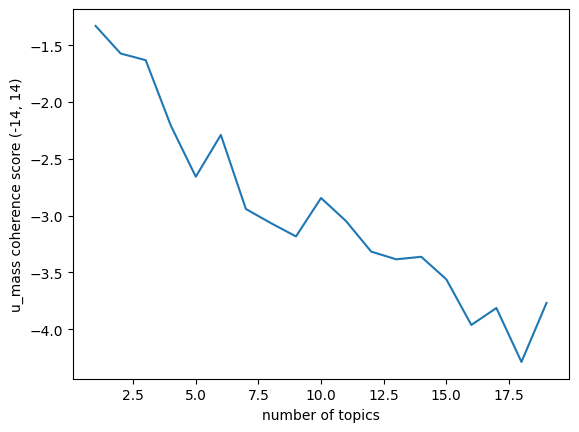

In [17]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=100)
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
  topics.append(i)
  score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('number of topics')
_=plt.ylabel('u_mass coherence score (-14, 14)')
plt.show()

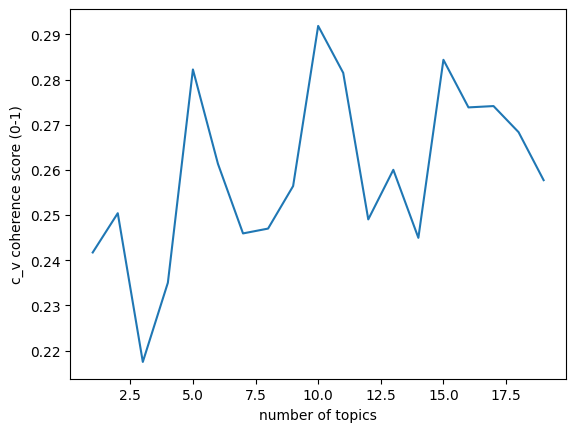

In [18]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=100)
  cm = CoherenceModel(model=lda_model, texts=data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
  topics.append(i)
  score.append(cm.get_coherence())

_=plt.plot(topics, score)
_=plt.xlabel('number of topics')
_=plt.ylabel('c_v coherence score (0-1)')
plt.show()

Choosing the applicable number of topics has not been an easy challenge, and the number - 5 was the result of trial and error. A brief reasoning follows the following steps:

*  We chose C_V coherence score as the measure as it provides the highest human interpretability. Consequently, the number of topics with the highest C_V score is the most coherent. The graph demonstrated 10 and 5 as the highest spikes in topic coherency.
*  While 10 peaks higher, after testing it, a plurality of topics was too large and was hardly interpretable. Consequently, 5 topics seem to be a better choice.
*  Additional evidence supporting 5 topics was the BERT model, which has identified a similar number of topics within the national anthems.

In [19]:
# modeling with optimal number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, iterations=10, passes=10, random_state=100)


In [20]:
# Print topics
lda_model.print_topics(-1)

[(0,
  '0.026*"land" + 0.014*"country" + 0.012*"love" + 0.012*"let" + 0.012*"free" + 0.009*"live" + 0.008*"peace" + 0.008*"stand" + 0.007*"make" + 0.007*"bless"'),
 (1,
  '0.009*"light" + 0.009*"arm" + 0.009*"live" + 0.009*"let" + 0.008*"so" + 0.008*"homeland" + 0.007*"long" + 0.007*"salute" + 0.007*"flag" + 0.007*"people"'),
 (2,
  '0.016*"homeland" + 0.014*"die" + 0.012*"glory" + 0.011*"let" + 0.010*"live" + 0.009*"freedom" + 0.008*"slave" + 0.008*"people" + 0.008*"free" + 0.007*"nation"'),
 (3,
  '0.021*"land" + 0.012*"nation" + 0.010*"ever" + 0.008*"hail" + 0.008*"let" + 0.008*"people" + 0.008*"love" + 0.008*"heart" + 0.007*"free" + 0.007*"home"'),
 (4,
  '0.020*"people" + 0.010*"land" + 0.009*"let" + 0.007*"fatherland" + 0.006*"blood" + 0.006*"man" + 0.006*"here" + 0.006*"come" + 0.005*"glory" + 0.005*"child"')]

Visualizing the topics with word clouds reveals apparent differences, although there is some overlap that makes it challenging to distinctly categorize the groups. Nonetheless, we provide a general overview of each topic:

Topic 1 - Demonstrates a strong tendency towards love and peace.

Topic 2 - Encompasses a more holistic mentioning of light, flag, and salute.

Topic 3 - Appears secretive, with mentions of death and themes related to freedom/slavery.

Topic 4 - Arguably the most nationalistic.

Topic 5 - Represents a somewhat mixed combination of the 3rd and 4th topics.

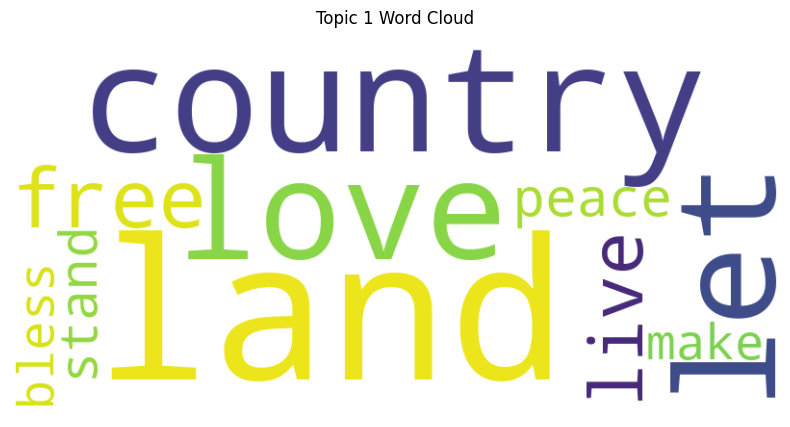

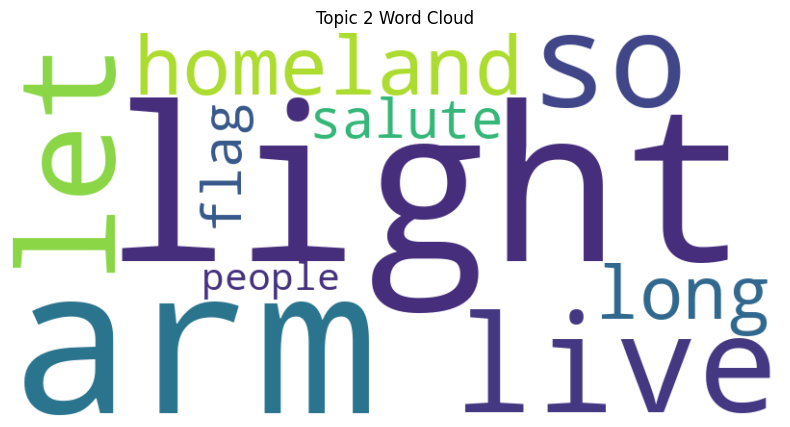

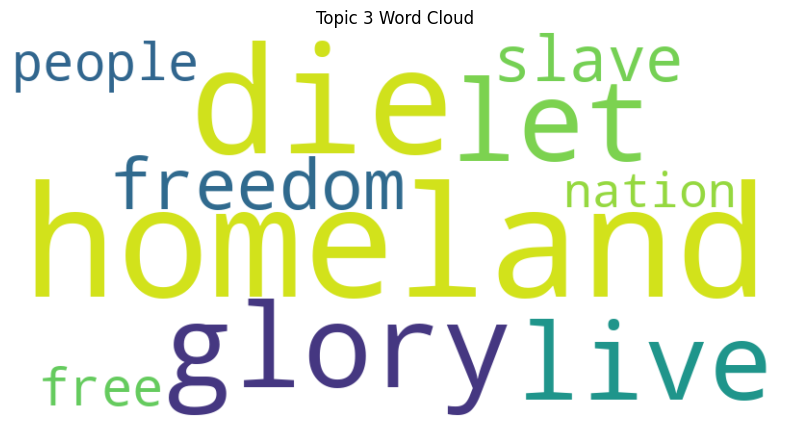

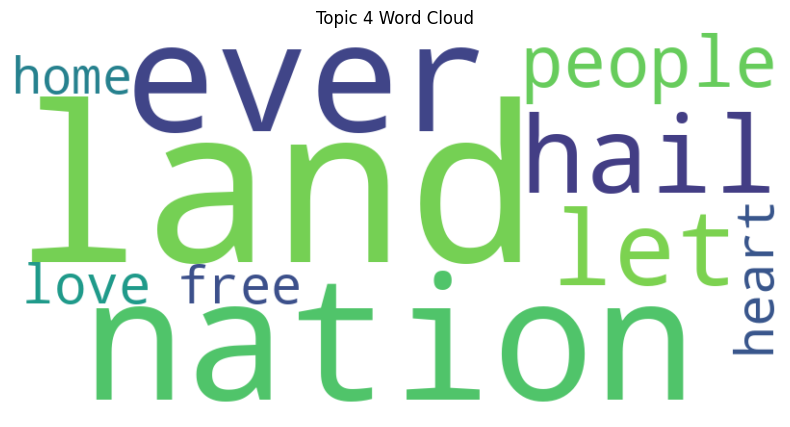

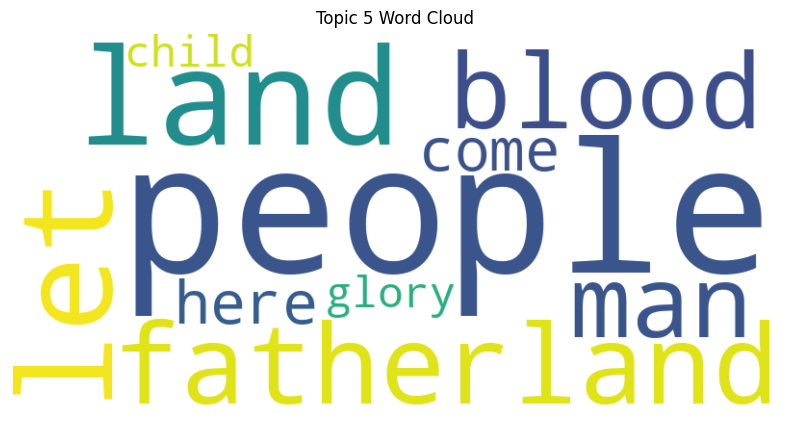

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given topic
def generate_wordcloud(lda_model, topic_num, num_words=10):
    words = lda_model.show_topic(topic_num, topn=num_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num + 1} Word Cloud')
    plt.show()

# Generate word clouds for each topic
for topic_num in range(lda_model.num_topics):
    generate_wordcloud(lda_model, topic_num)


In [21]:
# Get the topic number for each document
lda_topic_per_document = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Add the 'lda_topic' variable to the DataFrame
df['lda_topic'] = lda_topic_per_document

# Display the DataFrame with the added 'lda_topic' variable
print(df)

            Country Alpha-2 Alpha-3 Continent  \
0           Albania      AL     ALB    Europe   
1           Armenia      AM     ARM    Europe   
2           Austria      AT     AUT    Europe   
3        Azerbaijan      AZ     AZE    Europe   
4           Belarus      BY     BLR    Europe   
..              ...     ...     ...       ...   
185         Tunisia      TN     TUN    Africa   
186          Uganda      UG     UGA    Africa   
187  Western Sahara      EH     ESH    Africa   
188          Zambia      ZM     ZMB    Africa   
189        Zimbabwe      ZW     ZWE    Africa   

                                                Anthem  Word_Count  lda_topic  
0    Around our flag we stand united, With one wish...         146          0  
1    Our Fatherland, free, independent, That has fo...          85          2  
2    Land of mountains, land by the river, Land of ...          99          4  
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...         138          0  
4    We, Be

<ipython-input-18-b890412ea444>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


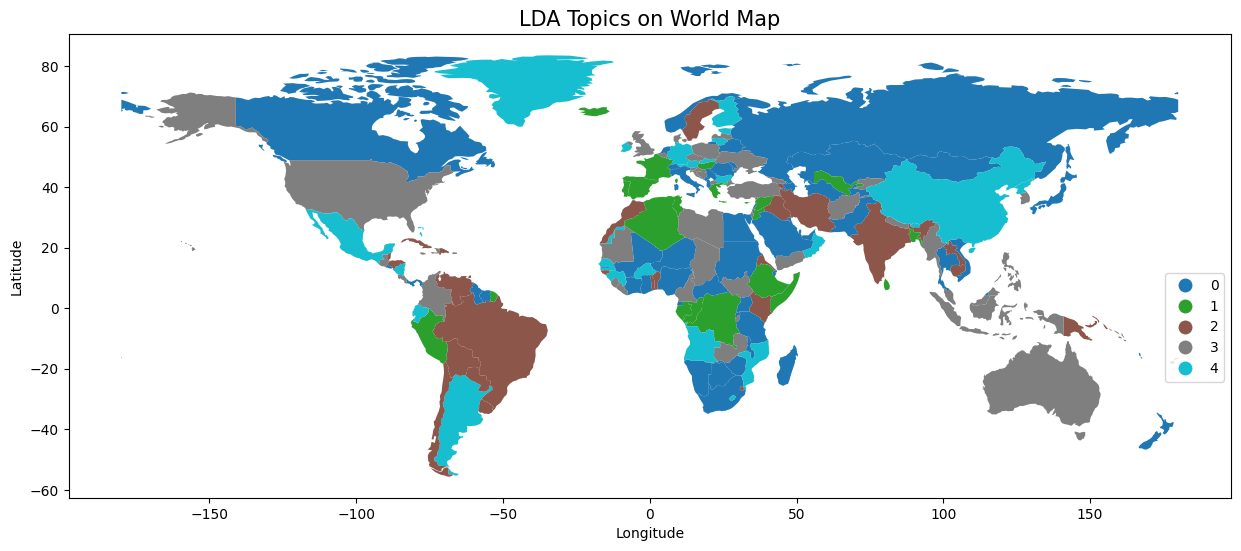

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map GeoDataFrame with the DataFrame containing lda_topic
merged_df = world.merge(df, left_on='iso_a3', right_on='Alpha-3')

# Plot the world map with different colors for each LDA topic
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='lda_topic', categorical=True, legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1, 0.5)})

# Add title and labels
ax.set_title('LDA Topics on World Map', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


Lastly, we visualize the topic distribution on the world map. Creating such a visual representation of the topic distribution provides an easy way to observe any geographical determinants influencing the topic distribution. While there are no clear geographical patterns on a larger scale, some small-scale similarities emerge, such as coherence among Latin American countries, similarities in Southeast Asian islands and Oceania, and similarities in South African states. Additionally, there are patterns observed in some post-Soviet countries. However, these trends may not be strong enough to make definitive claims and could be the result of mere chance.

Consequently we move to the next stage of analysis and will utilise BERT for topic modeling

# BERTopic - topic modeling with transformer

While the market standard for topic modeling is using LDA, BERT provides additional value, especially when the input data is small in size. This advantage can be explained in the way these two models approach the task. While LDA is a supervised model that requires building vocabulary, BERT is a pre-trained unsupervised model that has already been trained and possesses information on the semantic value of words. Consequently, small input texts such as tweets, for example, are better analyzed using BERT as it already possesses the required pre-training to grasp the context better. Furthermore LDA often requires additional steps, such as tuning the number of topics and assessing coherence scores, to determine the optimal number of topics.While BERTopic already uses the "c-TF-IDF" (class-based TF-IDF) to identify topics and does not require preprocessing like stop-word removal. It uses c-TF-IDF to select the most representative words for each topic. While LDA might struggle with ambiguous words BERTopic can handle semantic relationships better due to the contextual embeddings provided by BERT.

However, as Grootendorst (2022, pg. 8) states, there is no model without weaknesses, and BERT is no different. Understanding the weaknesses of the model allows us to, on one hand, better understand the results as well as potentially counter them if needed. One such shortcoming associated with BERT is that it provides just one topic per document. Unlike LDA, which assigns one or more topics if needed to the same document, BERT only provides one. For the purpose of this analysis, having just one topic per document (anthem) seems to be more than suitable, especially as the input data is small in size, and logic dictates that it does not provide enough space for a set of topics to be developed based on the scale.

In [19]:
%%capture
!pip install bertopic
import bertopic as BERTpic

The BERTopic GitHub page (https://maartengr.github.io/BERTopic/faq.html#how-do-i-remove-stop-words) advises that no preprocessing of the data is needed. According to the page, BERT has been trained on both real-world and preprocessed data, enabling it to handle various scenarios. We do not exert extra effort on cleaning the input data and use national anthems in their raw format. The only precautionary step taken is to limit the influence of frequently repeated words by using ClassTFIDFTransformer.

In [36]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

df['Bert_topic'] = None  # Initialize a new column for Bert_topic

# Set a seed for reproducibility
seed_value = 50  #for the puporse of replicability, setting seed_value ensures that results will be same

# Set the random seed
import random
import torch
import numpy as np

random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)

# Initialize ClassTFIDFTransformer
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Initialize BERTopic model with ClassTFIDFTransformer
topic_model = BERTopic(ctfidf_model=ctfidf_model, language="english", calculate_probabilities=True, verbose=True)

# Fit and transform BERTopic on the 'Anthem' column
topics, probabilities = topic_model.fit_transform(df['Anthem'])

# Assign the topics to the 'Bert_topic' column in the DataFrame
df['Bert_topic'] = topics

# Display the DataFrame with the assigned BERTopic topics
print(df)


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

            Country Alpha-2 Alpha-3 Continent  \
0           Albania      AL     ALB    Europe   
1           Armenia      AM     ARM    Europe   
2           Austria      AT     AUT    Europe   
3        Azerbaijan      AZ     AZE    Europe   
4           Belarus      BY     BLR    Europe   
..              ...     ...     ...       ...   
185         Tunisia      TN     TUN    Africa   
186          Uganda      UG     UGA    Africa   
187  Western Sahara      EH     ESH    Africa   
188          Zambia      ZM     ZMB    Africa   
189        Zimbabwe      ZW     ZWE    Africa   

                                                Anthem  Word_Count  lda_topic  \
0    Around our flag we stand united, With one wish...         146          0   
1    Our Fatherland, free, independent, That has fo...          85          2   
2    Land of mountains, land by the river, Land of ...          99          4   
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...         138          0   
4    W

BERTopic has mapped out four topics spread across the anthems (note: -1 is referred to as outliers, indicating those not assigned to any of the groups).

The largest group identified by the BERT model is Group 0, which can be described as connecting the concepts of holiness and land. The second-largest group is Group 1, characterized by a strong sense of unity. Following that is Group 2, which refers to history, and the last group, Group 3, places emphasis on individual duty and belonging.

In [37]:
# Calculate the distribution of topics
topic_distribution = df['Bert_topic'].value_counts().sort_index()

# Display the topic statistics DataFrame
print(topic_distribution)

-1    52
 0    60
 1    47
 2    17
 3    14
Name: Bert_topic, dtype: int64


In [1]:
topic_model.get_topic(2
                      )  # Select the most frequent topic

NameError: name 'topic_model' is not defined

In [42]:
topic_model.visualize_barchart(top_n_topics=5)

In [39]:
freq = topic_model.get_topic_info(); freq.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,52,-1_our_and_of_the,"[our, and, of, the, to, we, for, are, my, in]","[Let us salute the Fatherland, Proud to be cal..."
1,0,60,0_our_land_and_of,"[our, land, and, of, god, in, are, to, the, thy]","[Oh, say can you see by the dawn's early light..."
2,1,47,1_us_let_our_and,"[us, let, our, and, of, we, africa, one, all, to]","[Hail to thee, land of our forefathers' Thou w..."
3,2,17,2_the_its_that_to,"[the, its, that, to, before, which, in, your, ...","[The peoples of the Americas, unfortunately, W..."
4,3,14,3_country_my_him_is,"[country, my, him, is, of, his, the, arabs, gr...",[Long live the King! Long live the King! His p...


By mapping the intertopic distance, we can visualize the space between the topics. This approach provides us with visual cues to understand how different selected topics are from each other and if there is any possibility for them to intertwine.

The visualization below demonstrates that topics mapped by the BERT model do not overlap. They are distanced from each other, indicating that thematically, these topics should be distinct from each other.

In [2]:
topic_model.visualize_topics()

NameError: name 'topic_model' is not defined

By hierarchical clustering, we idnetify which of the topics are most colesely linked to each other. While such approach bring rather heafty infromation in analyis when the number of mapped topics is large, in our case it does not bring much value. Houwever its still provides a easy way of visualisation of which topics are closely related.

In [41]:
topic_model.visualize_hierarchy(top_n_topics=50)


Lastly, similar to the LDA model, we conclude the visualization of the BERT topics with the world map. However, unlike the LDA world map, the BERT world map shows a clear influence of geographical determinants. Colors demonstrate the topic distribution. The topics identified in the previous part of the analysis can be distributed in the following way:

* Topic 0: A strong emphasis on the holy is frequent among Central and Eastern European countries, post-Soviet countries, South-East Asian countries, as well as the US and Brazil.

* Topic 1: A strong sense of unity is demonstrated all around African nations and China.

* Topic 2: Emphasis on history/past is spread among Latin American countries and Western Europe (Spain and Portugal).

* Topic 3: A strong emphasis on individual responsibility is common for Middle Eastern countries.

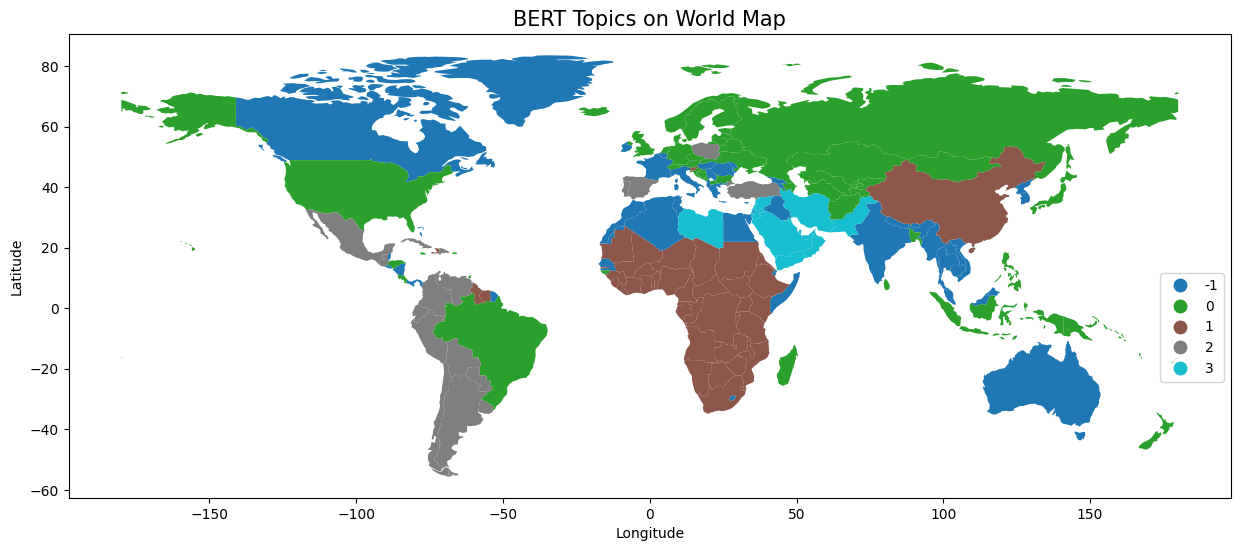

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Bert_topic' column and 'Country' column using Alpha-3 codes

# Load the world map GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map GeoDataFrame with the DataFrame containing Bert_topic
merged_df = world.merge(df, left_on='iso_a3', right_on='Alpha-3')

# Plot the world map with different colors for each BERT topic
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.plot(column='Bert_topic', categorical=True, legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1, 0.5)})

# Add title and labels
ax.set_title('BERT Topics on World Map', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


#Conclusion



In our attampt to make snese of the national anthems, we employed topic modeling as a means to categorize anthems into coherent thematic units. Utilizing two distinct models, LDA and BERTopic, offered us unique perspectives. LDA, a classic probabilistic model reliant on bag-of-words representations. BERTopic harnesses contextual embeddings from the BERT model, enabling a more nuanced understanding of semantic relationships between words. In our task, BERTopic emerged as more suitable model, providing more insigtful results, particularly when considering geographical patterns. However, it might come down to the limits of our(my) ability to interpret results generated by LDA model.

The analysis not only offers valuable findings but also serves as a launching pad for further exploration. Subsequent stages of research could use World Value Survey (WVS) data to study the correlation between national anthems and broader societal values. Understanding the thematic nuances within national anthems can contribute to a more profound comprehension of the cultural, historical, and societal fabric of nations.

#Refferences:

* Kedia, A., & Rasu, M. (2020). Hands-on Python natural language processing: explore tools and techniques to analyze and process text with a view to building real-world NLP applications. Packt Publishing Ltd.

* Röder, M., Both, A., & Hinneburg, A. (2015). Exploring the space of topic coherence measures. In Proceedings of the eighth ACM international conference on Web search and data mining (pp. 399-408).

* Zvornicanin, W. (2023). When coherence score is good or bad in topic modeling? Retrieved from https://www.baeldung.com/cs/topic-modeling-coherence-score

* Grootendorst, M. (2022). BERTopic: Neural topic modeling with a class-based TF-IDF procedure. arXiv preprint arXiv:2203.05794.

* Syed, S., & Spruit, M. (2017). Full-text or abstract? examining topic coherence scores using latent dirichlet allocation. In 2017 IEEE International conference on data science and advanced analytics (DSAA) (pp. 165-174). IEEE.

* Samsir, S., Saragih, R. S., Subagio, S., Aditiya, R., & Watrianthos, R. (2023). BERTopic Modeling of Natural Language Processing Abstracts: Thematic Structure and Trajectory. Jurnal Media Informatika Budirama, 7(3), 1514-1520.


Additional Note:

* ChatGPT 3 has been used for refining the code.

* Stack Overflow has been consulted to make sense of errors and address topic modeling issues.

* Medium articles have been referenced to understand certain concepts where academic resources were limited or presented in explicitly technical terms.
  *  https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0
  *  https://medium.com/@m.nath/topic-modeling-algorithms-b7f97cec6005#:~:text=Topic%20modeling%20is%20a%20part,relevant%20insights%20from%20textual%20data.
  *  https://medium.com/@n83072/topic-modeling-bertopic-ca1b73a035f2
  *  https://medium.com/digital-engineering-centific/bertopic-modelling-advanced-topic-modelling-73af7697b7f3
  *  https://medium.com/cmotions/an-in-depth-introduction-to-topic-modeling-using-lda-and-bertopic-a71d3ed5b889

